# Virtual Mouse Control

- Understanding The Mediapipe Library
- Hand Landmark Detection using Mediapipe
- PyAutoGUI For Controlling Mouse Cursor

### MediaPipe
- Open-source framework by Google.
- Enables real-time ML pipelines.
- Offers modular components for computer vision tasks.
- Includes pre-built solutions for hand tracking, pose estimation, and more.
- Efficient, cross-platform, and customizable.
- Integrates with TensorFlow, OpenCV, and others.
- Growing ecosystem with expanding functionalities.

### PyAutoGUI

- Python module for automating GUI interactions.
- Works on Windows, macOS, and Linux.
- Can be used to Control mouse (moveTo(), click()), keyboard (typewrite()), and GUI elements.
- Provides delay control, screenshot capture, and utility functions.
- Automates tasks, tests GUI apps, assists in accessibility, and more.

### Hand Landmark Detection using Mediapipe

- Hand Tracking Module in MediaPipe is designed to detect and track the landmarks (key points) on human hands in real-time from video input.

- It identifies and tracks specific points on the hand, such as fingertips, knuckles, and the palm.

- Provides the 3D coordinates of these landmarks in a normalized coordinate system, giving information about their positions in the captured frame.

- Utilizes a machine learning-based model trained on annotated hand images to recognize and localize landmarks accurately.

- Optimized for efficiency, enabling real-time hand landmark detection even on devices with limited computational resources.

- Shows robustness in various lighting conditions, hand orientations, and diverse skin tones.

- Easily integratable into applications for gesture recognition, virtual interfaces, and interactive experiences.

- Often visualized by drawing lines and points on the detected landmarks over the video frames, providing a clear representation of the hand's pose and movements.

- Allows for customization, potentially enabling the addition of more landmarks or adapting the system to specific use cases.

- Used in various applications like virtual reality, sign language recognition, hand gesture control interfaces, and augmented reality experiences.

### PyAutoGUI For Controlling Mouse Cursor

- Begin by importing the PyAutoGUI module in your Python script: import pyautogui.

- pyautogui.moveTo(x, y, duration): Moves the cursor to the specified (x, y) coordinates on the screen over a duration (in seconds).

- pyautogui.size(): Retrieves the screen's width and height as a tuple (width, height).

- pyautogui.position(): Returns the current (x, y) coordinates of the cursor on the screen.

- pyautogui.click(x, y, button): Simulates a click at the specified (x, y) coordinates using the specified mouse button.

- pyautogui.dragTo(x, y, duration): Drags the mouse cursor to the specified (x, y) coordinates over a duration.

<hr>

## This program uses the MediaPipe library along with OpenCV and PyAutoGUI to create a virtual mouse controlled by hand gestures

In [ ]:
import cv2
import mediapipe as mp
import pyautogui

cap = cv2.VideoCapture(0)
hand_detector = mp.solutions.hands.Hands()
drawing_utils = mp.solutions.drawing_utils
screen_width, screen_height = pyautogui.size()
index_y = 0

while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    output = hand_detector.process(rgb_frame)
    hands = output.multi_hand_landmarks

    if hands:
        for hand in hands:
            drawing_utils.draw_landmarks(frame, hand)
            landmarks = hand.landmark
            for id, landmark in enumerate(landmarks):
                x = int(landmark.x*frame_width)
                y = int(landmark.y*frame_height)
                if id == 8:
                    cv2.circle(img=frame, center=(x, y), radius=10, color=(0, 255, 255))
                    index_x = screen_width/frame_width*x
                    index_y = screen_height/frame_height*y

                if id == 4:
                    cv2.circle(img=frame, center=(x, y), radius=10, color=(0, 255, 255))
                    thumb_x = screen_width/frame_width*x
                    thumb_y = screen_height/frame_height*y
                    if abs(index_y - thumb_y) < 20:
                        pyautogui.click()
                        pyautogui.sleep(1)
                    elif abs(index_y - thumb_y) < 100:
                        pyautogui.moveTo(index_x, index_y)

    cv2.imshow('Virtual Mouse', frame)

    # Check for 'Esc' key press to break the loop and close the window
    k = cv2.waitKey(1)
    if k == 27:
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


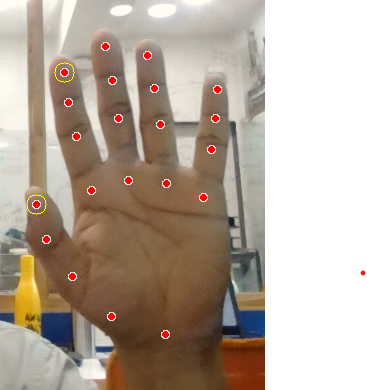

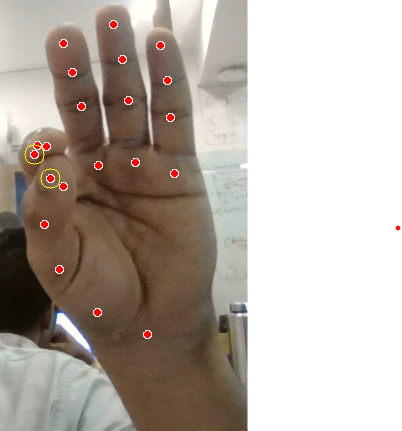

### Code Explanation 

#### Initialization:

- Import necessary libraries: cv2 for OpenCV, mediapipe for hand detection, and pyautogui for cursor control.
- Initialize the video capture (cap) from the default camera (0).

#### Hand Detection Setup:

- Set up the MediaPipe hands detection module (hand_detector).
- Utilize drawing_utils for visualizing landmarks on the frame.
- Retrieve screen size for cursor control using pyautogui.size().
    
#### Loop for Hand Detection:

- Iterate indefinitely (while True) to process each frame from the camera feed.
- Read a frame (cap.read()), flip it horizontally for mirroring (cv2.flip()), and retrieve frame dimensions.
- Convert the frame from BGR to RGB (cv2.cvtColor()), necessary for MediaPipe.
- Process the frame for hand detection using MediaPipe's hand_detector.process().
    
#### Hand Landmark Processing:

- Check for detected hands (output.multi_hand_landmarks).
- Draw landmarks on the frame using drawing_utils.draw_landmarks().
- Iterate through each detected hand's landmarks.
- Identify specific landmarks (index and thumb) and calculate their screen coordinates based on the frame dimensions and screen size.

#### Cursor Control:

- If the thumb is close to the index finger (abs(index_y - thumb_y) < 20), simulate a click using pyautogui.click().
- If the distance is moderate (abs(index_y - thumb_y) < 100), move the cursor to the calculated position using pyautogui.moveTo().

#### Display and Loop Termination:

- Display the frame with the detected landmarks as a 'Virtual Mouse' using cv2.imshow().
- Check for the 'Esc' key (k == 27) press to break the loop and close the window.
    
#### Clean-up:

- Release the camera feed (cap.release()) and close all OpenCV windows (cv2.destroyAllWindows()).

<hr>
<hr>